In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 一、图表元素

(-1.0, 1.0, -10.0, 10.0)

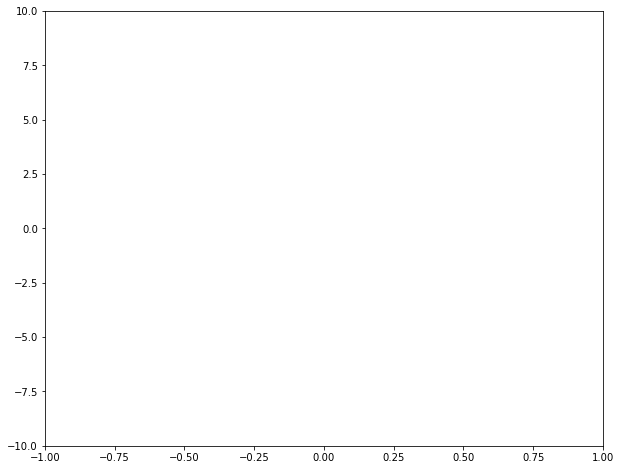

In [5]:
fig = plt.figure(figsize = (10,8))
plt.axis([-1,1,-10,10])

(0.0, 85.05)

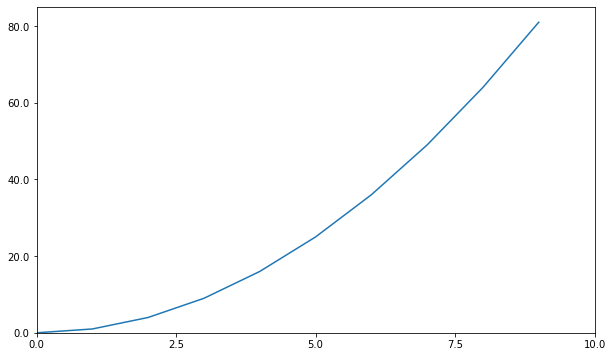

In [6]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

fig = plt.figure(figsize=(10,6))
ax = plt.subplot()
# 将x轴的主刻度设置为2.5的倍数，y轴的主刻度设置为20的倍数。
xmajorLocator = MultipleLocator(2.5)
xmajorFormatter = FormatStrFormatter('%.1f')
ymajorLocator = MultipleLocator(20)
ymajorFormatter = FormatStrFormatter('%.1f')
x = range(10)
y = [i**2 for i in x]
plt.plot(x,y)
ax.xaxis.set_major_locator(xmajorLocator)
ax.xaxis.set_major_formatter(xmajorFormatter)
ax.yaxis.set_major_locator(ymajorLocator)
ax.yaxis.set_major_formatter(ymajorFormatter)
ax.set_xlim(left = 0, right = 10)
ax.set_ylim(bottom = 0)

Text(0, 0.5, 'twin_axis')

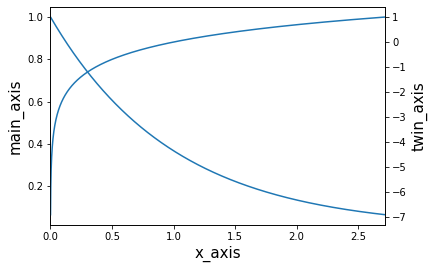

In [15]:
# 用twinx()设置主次坐标系
import numpy as np
fig, ax1 = plt.subplots() #注意不是subplot()
x = np.arange(1e-3, np.e, 0.001)
y1 = np.exp(-x)
y2 = np.log(x)
ax1.plot(x,y1)
ax1.set_ylabel('main_axis', fontsize=15)
ax1.set_xlabel('x_axis', fontsize=15)
ax2 = ax1.twinx()
ax2.plot(x,y2)
ax2.set_xlim([0,np.e])
ax2.set_ylabel('twin_axis', fontsize=15)

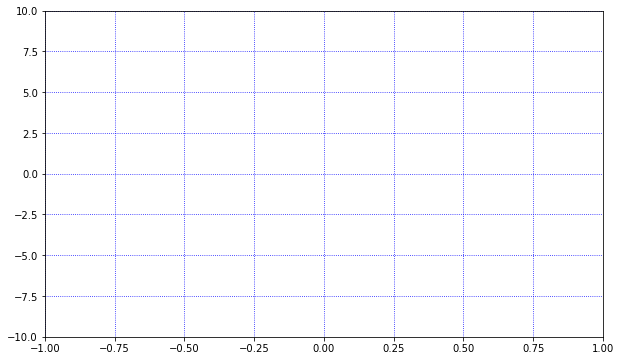

In [13]:
fig = plt.figure(figsize=(10,6))
plt.axis([-1,1,-10,10])
plt.grid(color='blue', linestyle=':')

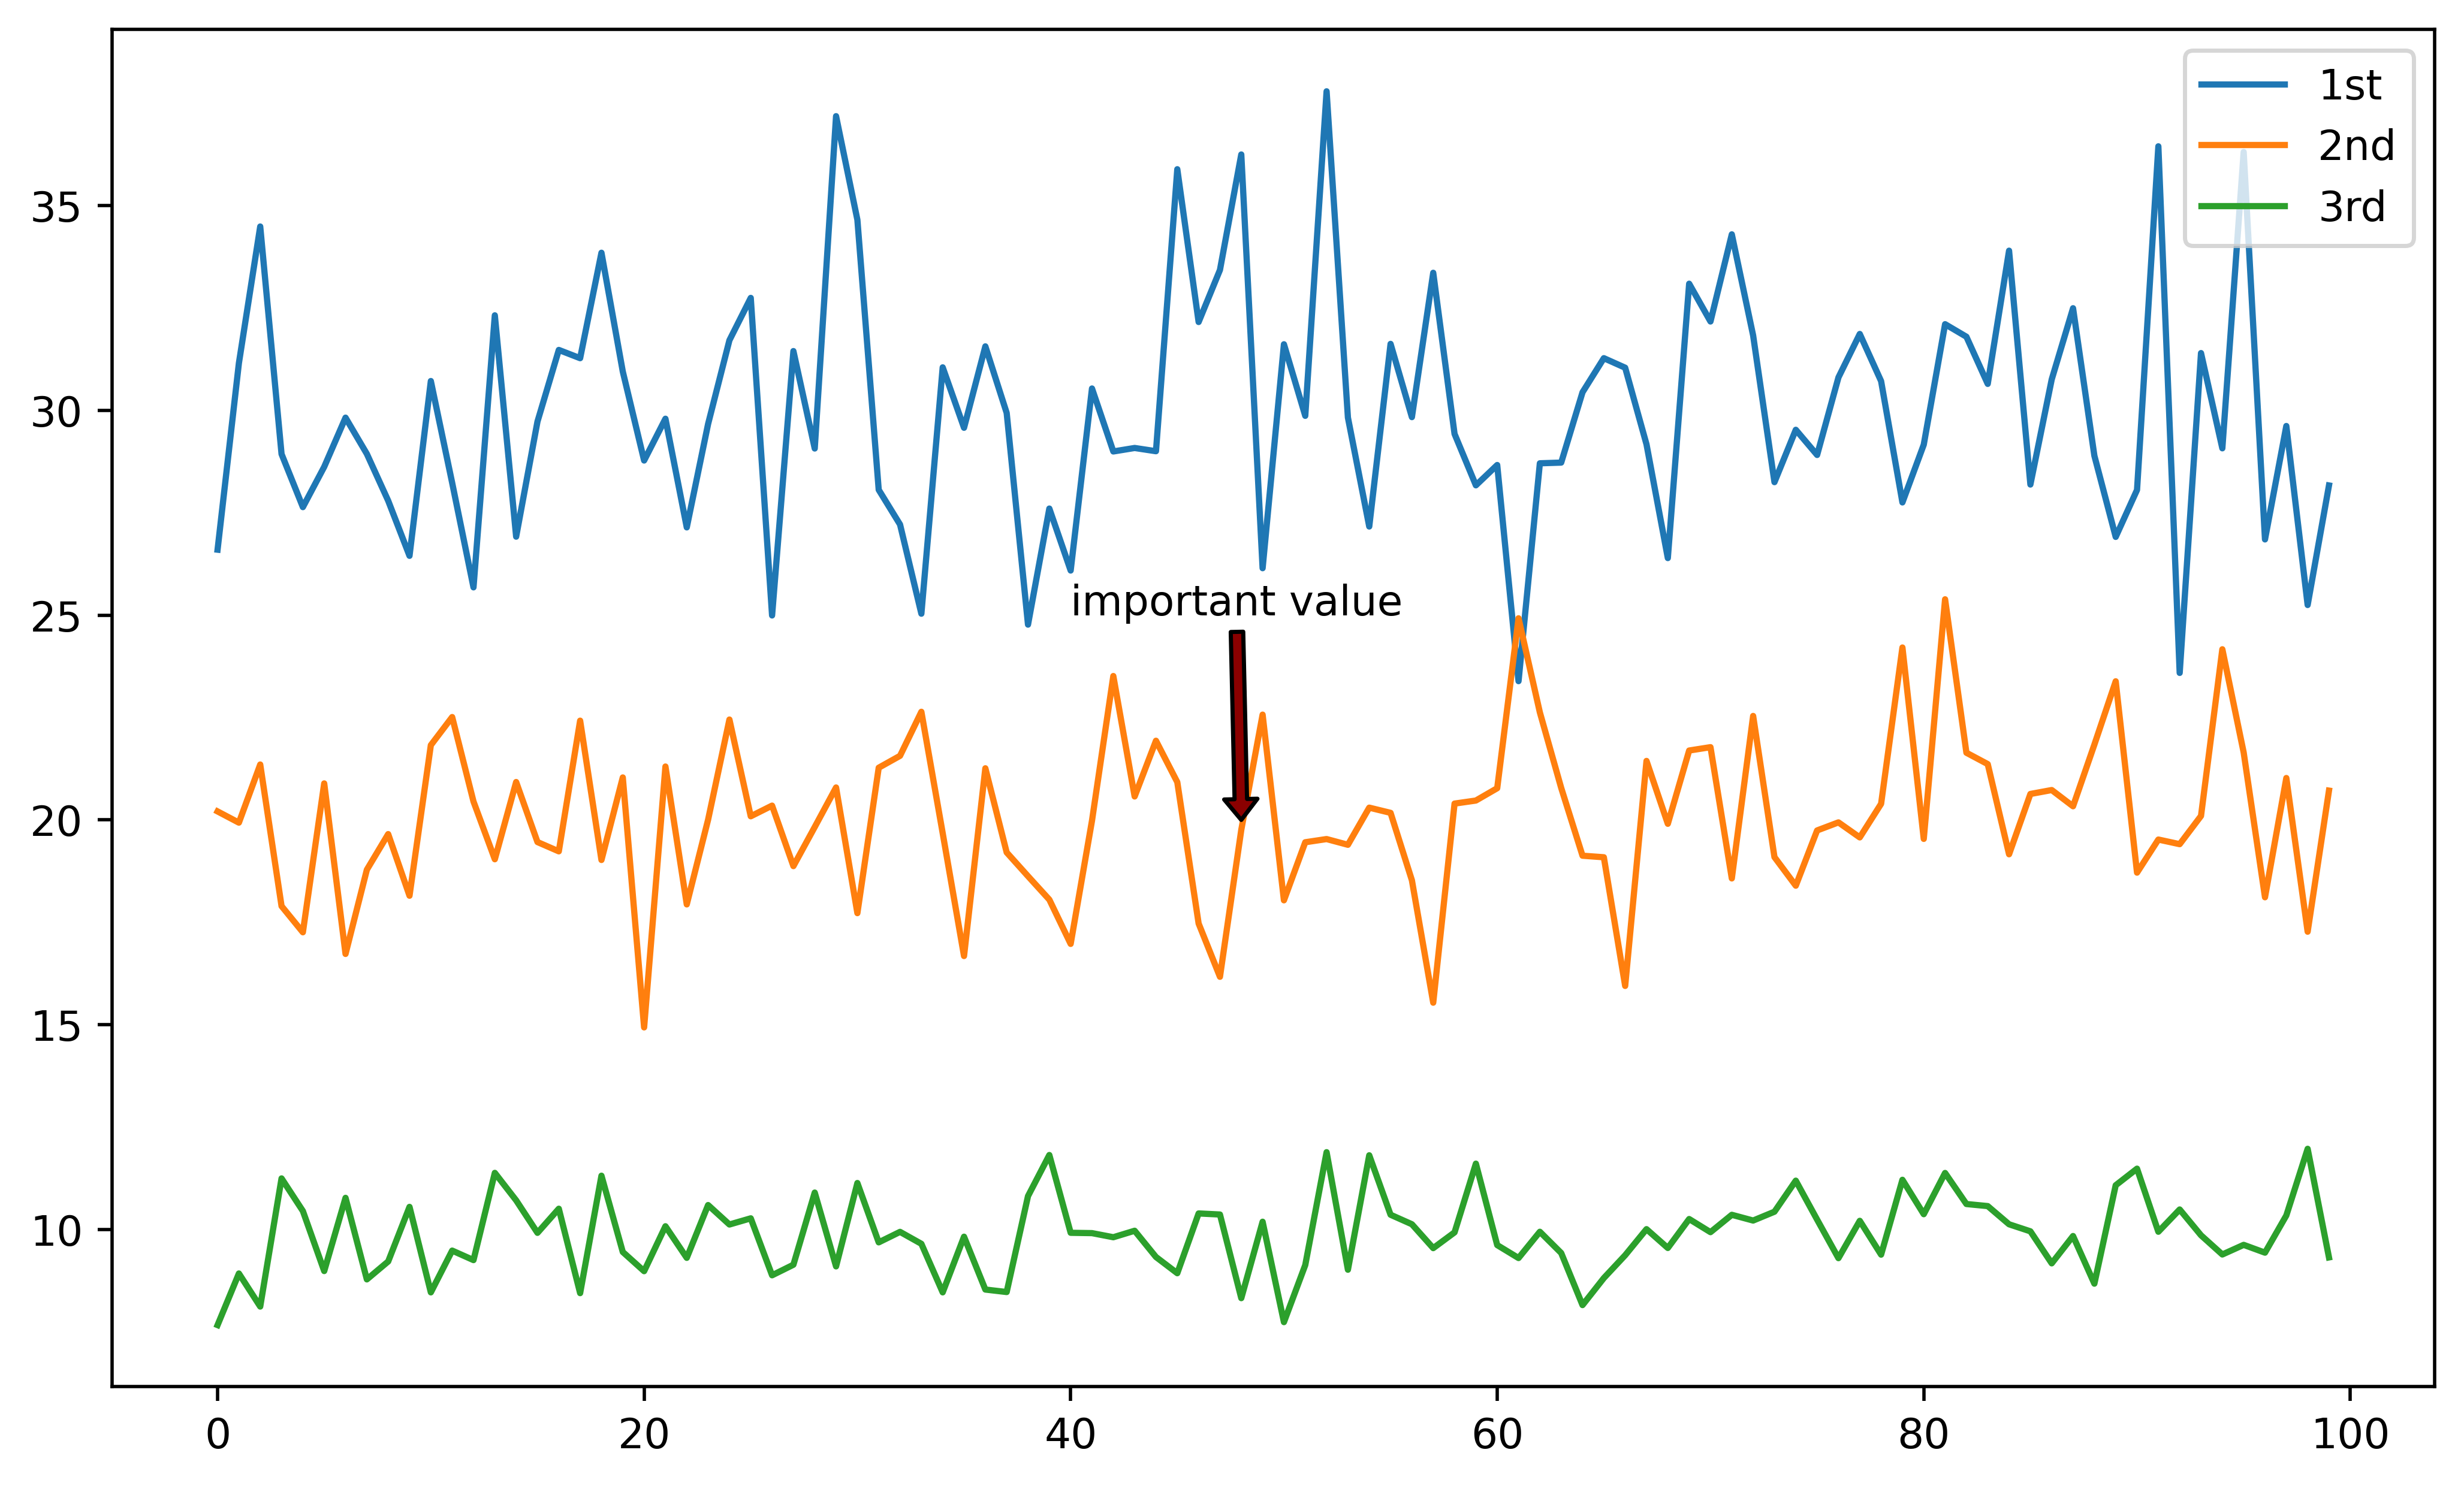

In [30]:
# 添加图例和注解
# 先随便画个无注解的图
np.random.seed(111)
fig = plt.figure(figsize=(10,6), dpi=500)
x1 = np.random.normal(30, 3, 100)
x2 = np.random.normal(20, 2, 100)
x3 = np.random.normal(10, 1, 100)
plt.plot(x1, label = '1st')
plt.plot(x2, label = '2nd')
plt.plot(x3, label = '3rd')

#添加图例需要用到figure.legend()
plt.legend(loc = 'upper right')

#用figure.annotate()添加箭头注解
plt.annotate('important value', xy=(48, 20), xytext=(40, 25), arrowprops=dict(facecolor='darkred', headlength=5, headwidth=8, width=3))

# 图片的保存
plt.savefig('save.png')


# 2.常见可视化图形
## （1）图形种类
- 线形图：有序别的变化
- 条形图：不同分类的某个变量的均值/中位数/众数
- 箱型图：不同分类的某个变量的最大值、最小值、中位数、上四分位数、下四分位数
- 饼图：每个分类所占的比例
- 直方图：一个连续数值型变量的频率/频数分布
- 散点图：两个连续数值型变量的关系

## （2）图形布局
- 分面图形
- 三维变量的可视化
- 可交互图


Text(0, 0.5, 'aveSpeed')

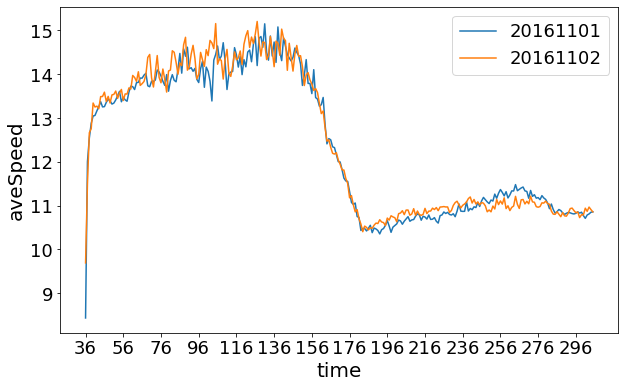

In [9]:
# 线形图
# 对比11月1日与11月2日的车速随时间的变化
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

data_all = pd.read_csv('F:/大学/第40期PRP/特征提取/1_feature_analysis/Intergated-DATASET-C.csv')
data_20161101_02 = data_all[(data_all['date']==20161101)|(data_all['date']==20161102)]
fig = plt.figure(figsize=(10,6))
min_time_id = data_20161101_02['time_id'].min()
max_time_id = data_20161101_02['time_id'].max()

x = np.arange(min_time_id, max_time_id + 1)

y1 = data_20161101_02[data_20161101_02['date']==20161101].groupby('time_id')['aveSpeed'].mean()
y2 = data_20161101_02[data_20161101_02['date']==20161102].groupby('time_id')['aveSpeed'].mean()

plt.plot(x, y1, label = '20161101')
plt.plot(x, y2, label = '20161102')
plt.xticks(np.arange(min_time_id,max_time_id,20))
plt.legend(fontsize=18, loc='upper right')
plt.tick_params(labelsize=18)
plt.xlabel('time', fontsize=20)
plt.ylabel('aveSpeed', fontsize=20)


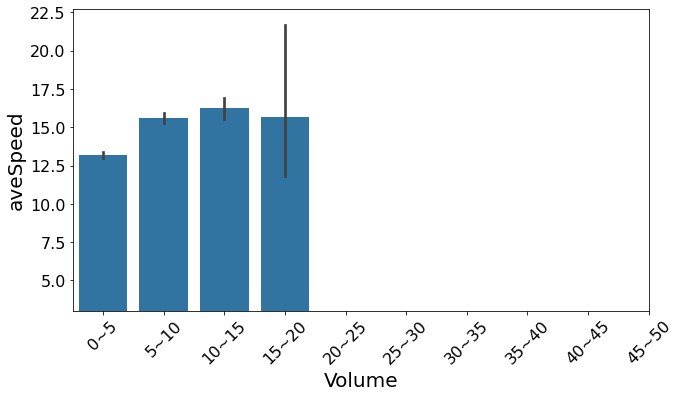

In [15]:
# 条形图 barplot()
# 对11月1号的第50个时间段的数据，按流量分类，绘制不同流量区间下的网格平均车速条形图
data = data_20161101_02[(data_20161101_02['date']==20161101)&(data_20161101_02['time_id']==60)]
data = data.reset_index(drop=True)
data['stop_or_not'] = data['stopNum'].apply(lambda x: 0 if x==0 else 1)
data['volume_CATE'] = data['volume']//5

fig = plt.figure(figsize=(10,6))  
sns.barplot(x='volume_CATE', y='aveSpeed', data=data, color='#1f77b4')  
x_bar = np.arange(10)  
y = data_20161101_02[data_20161101_02['date']==20161101].groupby('time_id')['aveSpeed'].mean()  
volume = ['0~5','5~10','10~15','15~20','20~25','25~30','30~35','35~40','40~45','45~50']  
plt.xticks(x_bar, volume, rotation=45)  
plt.ylim(bottom=3)  
plt.tick_params(labelsize=16)   
plt.xlabel('Volume', fontsize=20)  
plt.ylabel('aveSpeed', fontsize=20) 
fig.subplots_adjust(bottom=0.2, left=0.1, right=0.9, top=0.9) 

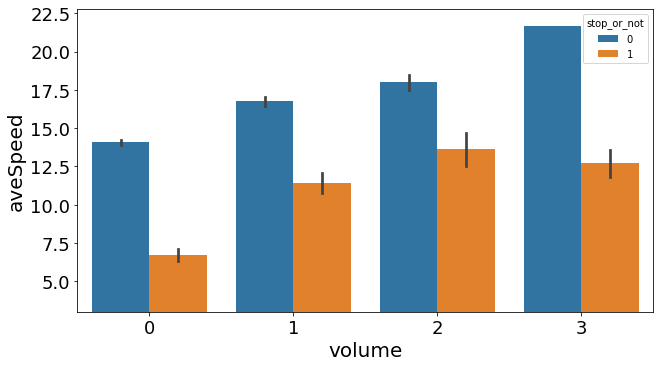

In [17]:
# 簇状条形图 barplot(,hue=)
fig = plt.figure(figsize=(10,6))  
sns.barplot(x='volume_CATE', y='aveSpeed', data=data, hue="stop_or_not")  
plt.ylim(bottom=3)  
plt.tick_params(labelsize=18)   
plt.xlabel('volume', fontsize=20)  
plt.ylabel('aveSpeed', fontsize=20)  
fig.subplots_adjust(bottom=0.2, left=0.1, right=0.9, top=0.9)

In [ ]:
# 频数条形图countplot()
fig = plt.figure(figsize=(10,6))    
sns.countplot(x='volume_CATE', data=data, color='#1f77b4')  
x_bar = np.arange(10)    
y = data_20161101_02[data_20161101_02['date']==20161101].groupby('time_id')['aveSpeed'].mean()    
volume = ['0~5','5~10','10~15','15~20','20~25','25~30','30~35','35~40','40~45','45~50']  
plt.xticks(x_bar, volume, rotation=45)  
plt.tick_params(labelsize=16)   
plt.xlabel('流量', fontsize=20)  
plt.ylabel('频数', fontsize=20)  
fig.subplots_adjust(bottom=0.2, left=0.1, right=0.9, top=0.9)